#E23CSEU1896

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

## 1. Geometric Transformations

In [ ]:
image_path = 'Lena_Image.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Scaling

In [ ]:
scale_img = cv2.resize(img, (250,250))
# plt.imshow(scale_img)
# plt.show()

Translation

In [ ]:
move_x = 120
move_y = 42
r = img.shape[:2]
M = np.float32([[1,0,move_x],[0,1,move_y]])
move_img = cv2.warpAffine(img, M, (r[1] + move_x, r[0] + move_y))
# plt.imshow(move_img)
# plt.show()

Rotate

In [ ]:
deg = 45
center = (r[1] / 2, r[0] / 2)
scale = 1.0

R=cv2.getRotationMatrix2D(center,deg,scale)
rotate_img = cv2.warpAffine(img,R,(r[1],r[0]))
# plt.imshow(rotate_img)
# plt.show()

Shear

In [ ]:
#y
y_shear = 0.4
S = np.float32([[1,y_shear,0],[0,1,0]])
shear_img = cv2.warpAffine(img,S,(r[1],r[0]))
# plt.imshow(shear_img)
# plt.show()

#x
x_shear = 0.4
S2 = np.float32([[1,0,0],[x_shear,1,0]])
shear_img2 = cv2.warpAffine(img,S2,(r[1],r[0]))
# plt.imshow(shear_img2)
# plt.show()

Reflection

In [ ]:
ref = cv2.flip(img,1)

# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(img)
# plt.title('Img')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(ref)
# plt.title('Reflection')
# plt.axis('off')

# plt.tight_layout()
# #plt.show()

Interpolation

In [ ]:
interpolated_img = cv2.resize(ref, (256, 256), interpolation=cv2.INTER_LINEAR)

# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(img)
# plt.title('Og')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(interpolated_img)
# plt.title('Interpolated Reflected Image')
# plt.axis('off')

# plt.tight_layout()
# #plt.show()

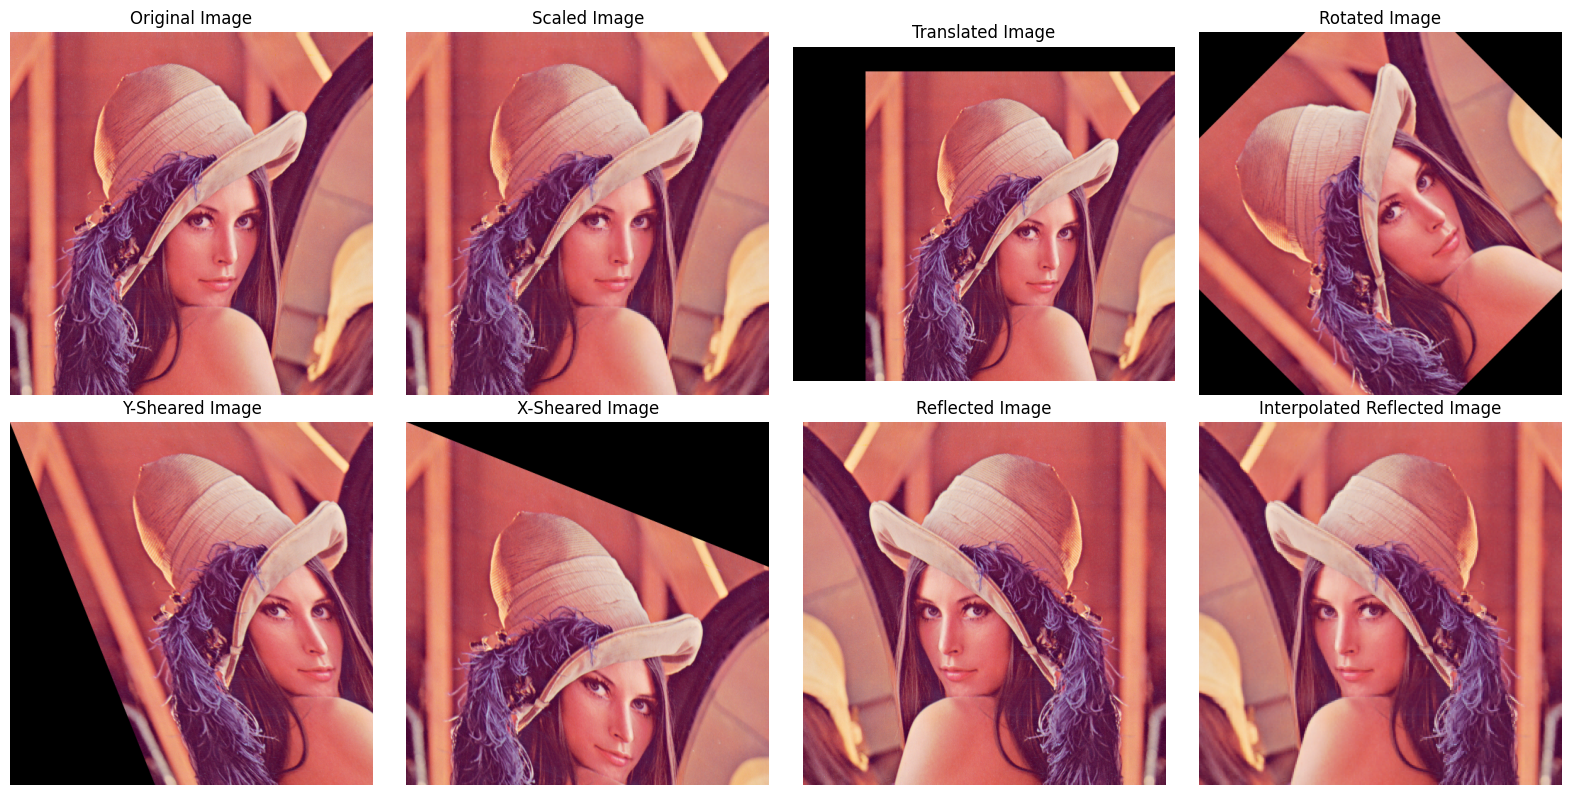

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(img)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(scale_img)
axs[0, 1].set_title('Scaled Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(move_img)
axs[0, 2].set_title('Translated Image')
axs[0, 2].axis('off')

axs[0, 3].imshow(rotate_img)
axs[0, 3].set_title('Rotated Image')
axs[0, 3].axis('off')

axs[1, 0].imshow(shear_img)
axs[1, 0].set_title('Y-Sheared Image')
axs[1, 0].axis('off')
axs[1, 1].imshow(shear_img2)
axs[1, 1].set_title('X-Sheared Image')
axs[1, 1].axis('off')


axs[1, 2].imshow(ref)
axs[1, 2].set_title('Reflected Image')
axs[1, 2].axis('off')

axs[1, 3].imshow(interpolated_img)
axs[1, 3].set_title('Interpolated Reflected Image')
axs[1, 3].axis('off')
plt.tight_layout()
plt.show()

2. Greyscaled Images

2.1 Negative

In [ ]:
camera_man = cv2.imread('camera_man.jpg')

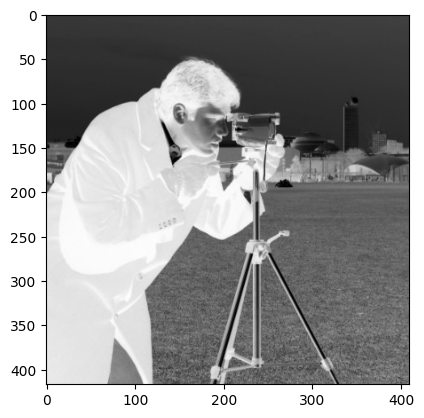

In [ ]:
neg = cv2.bitwise_not(camera_man)
plt.imshow(neg)

2.2 and 2.3

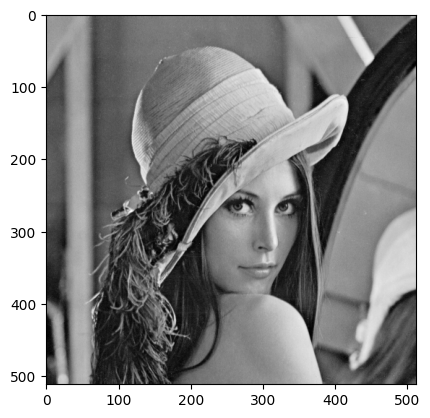

In [ ]:
img = cv2.imread('Lena_Image.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

In [ ]:
c = 255 / np.log(1 + 255)
logt = c * np.log(1 + gray_img.astype(np.float32))
logt = np.array(logt, dtype=np.uint8)

In [ ]:
gray_img_normalized = gray_img.astype(np.float32) / 255.0

inv_log_raw = np.exp(gray_img_normalized / c) - 1

min_val = np.min(inv_log_raw)
max_val = np.max(inv_log_raw)

if max_val == min_val:
    invlog = np.zeros_like(inv_log_raw, dtype=np.uint8)
else:
    scaled_inv_log = ((inv_log_raw - min_val) / (max_val - min_val)) * 255
    invlog = np.array(scaled_inv_log, dtype=np.uint8)


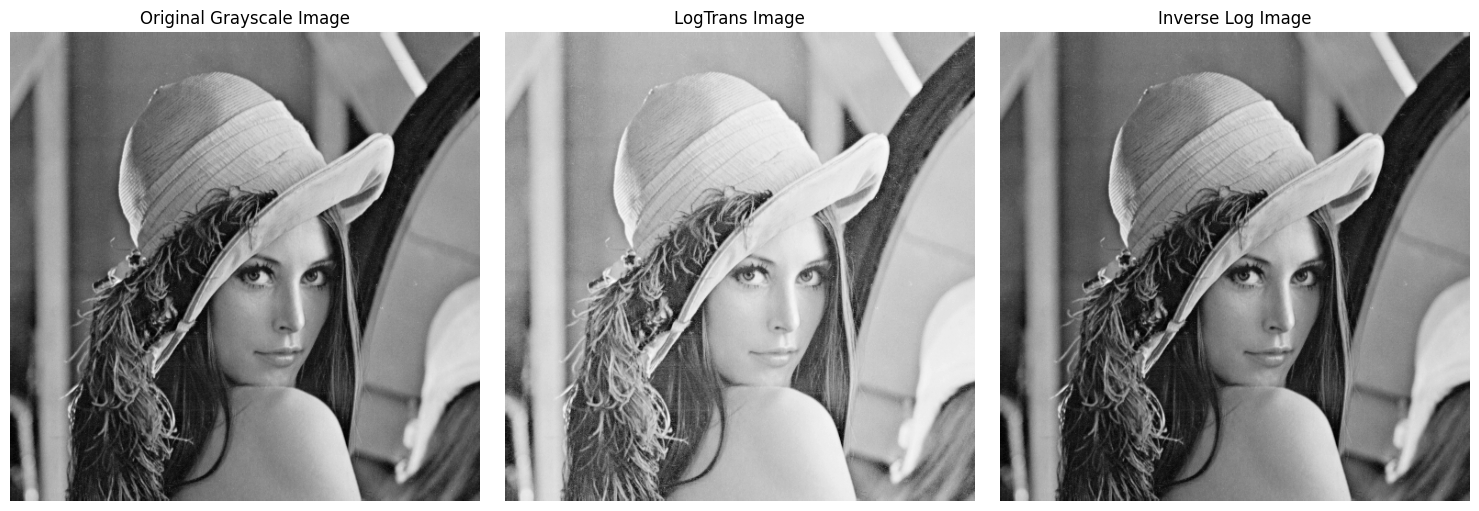

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(logt, cmap='gray')
plt.title('LogTrans Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(invlog, cmap='gray')
plt.title('Inverse Log Image')
plt.axis('off')

plt.tight_layout()
plt.show()

2.4 Power law

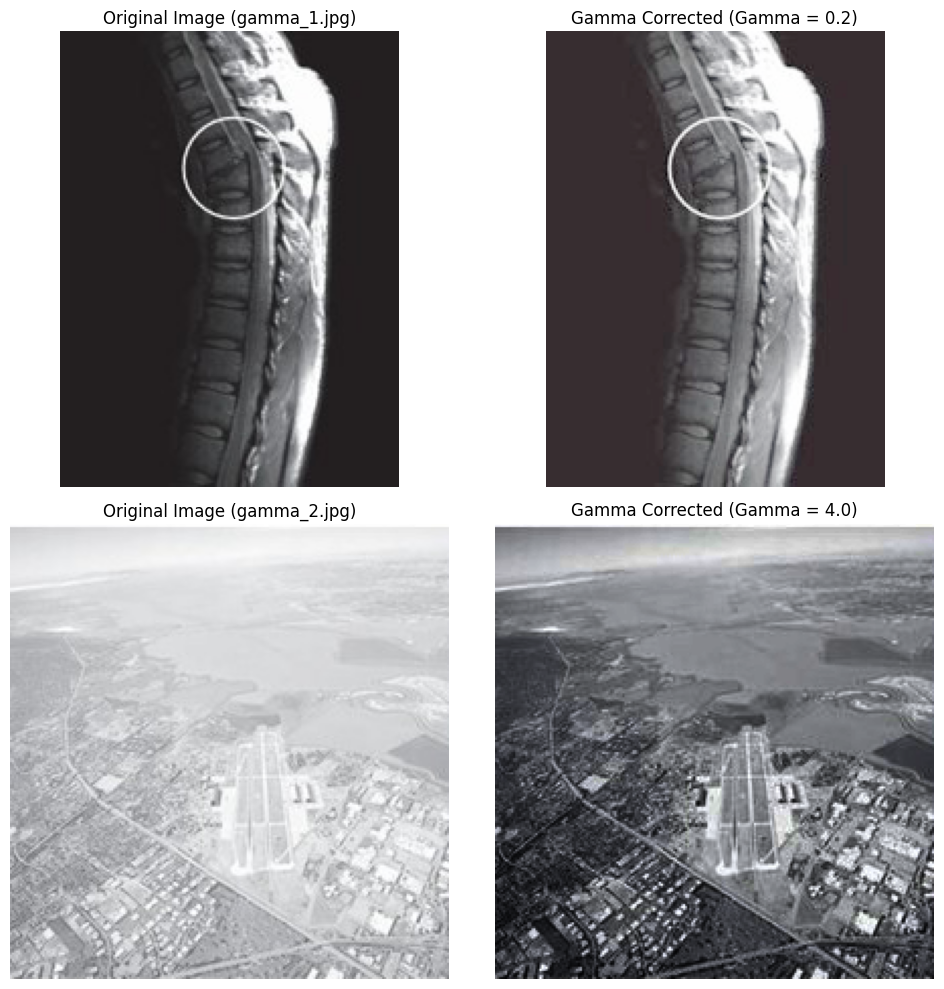

In [ ]:
gi1 = 'gamma_1.jpg'
gimg1 = cv2.imread(gi1)
gimg1_rgb = cv2.cvtColor(gimg1, cv2.COLOR_BGR2RGB)

gig2 = 'gamma_2.jpg'
gimg2 = cv2.imread(gig2)
gimg2_rgb = cv2.cvtColor(gimg2, cv2.COLOR_BGR2RGB)

g1 = 0.2
g2 = 4

gamma1 = np.power(gimg1.astype(np.float32), g1)
gamma1 = cv2.normalize(gamma1, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
gamma1_rgb = cv2.cvtColor(gamma1, cv2.COLOR_BGR2RGB)

gamma2 = np.power(gimg2.astype(np.float32), g2)
gamma2 = cv2.normalize(gamma2, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
gamma2_rgb = cv2.cvtColor(gamma2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(gimg1_rgb)
plt.title('Original Image (gamma_1.jpg)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gamma1_rgb)
plt.title('Gamma Corrected (Gamma = 0.2)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gimg2_rgb)
plt.title('Original Image (gamma_2.jpg)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gamma2_rgb)
plt.title('Gamma Corrected (Gamma = 4.0)')
plt.axis('off')

plt.tight_layout()
plt.show()

2.5 Piecewise linear Transform

In [ ]:
lci = cv2.imread('LowContrast2.jpg')
lc2img = cv2.cvtColor(lci, cv2.COLOR_BGR2GRAY)

In [ ]:
r1, s1 = 70, 0
r2, s2 = 170, 255
lut = np.zeros(256, dtype=np.uint8)
for i in range(256):
    if 0 <= i <= r1:
        lut[i] = int(s1 / r1 * i)
    elif r1 < i <= r2:
        lut[i] = int(((s2 - s1) / (r2 - r1)) * (i - r1) + s1)
    else:
        lut[i] = int(((255 - s2) / (255 - r2)) * (i - r2) + s2)


newimg = cv2.LUT(lc2img, lut)

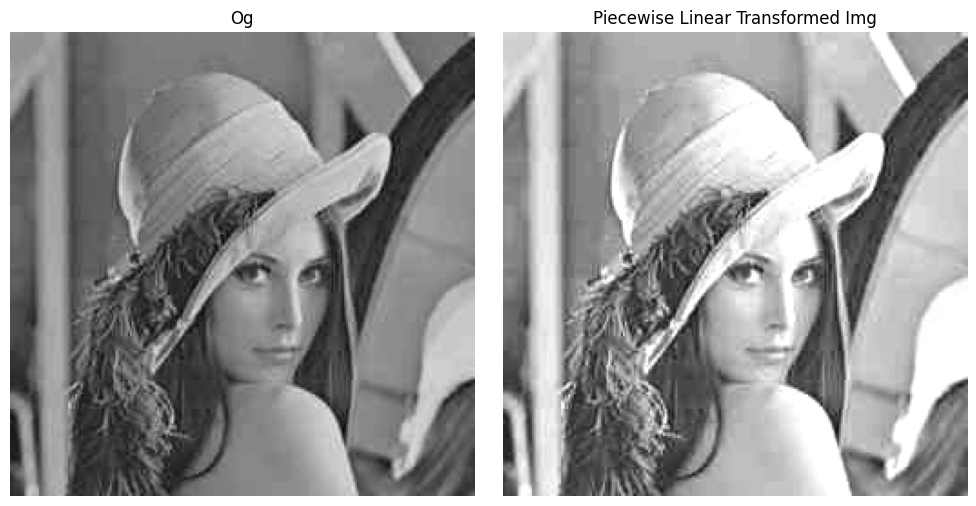

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(lc2img, cmap='gray')
plt.title('Og')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(newimg, cmap='gray')
plt.title('Piecewise Linear Transformed Img')
plt.axis('off')

plt.tight_layout()
plt.show()

3 histograms

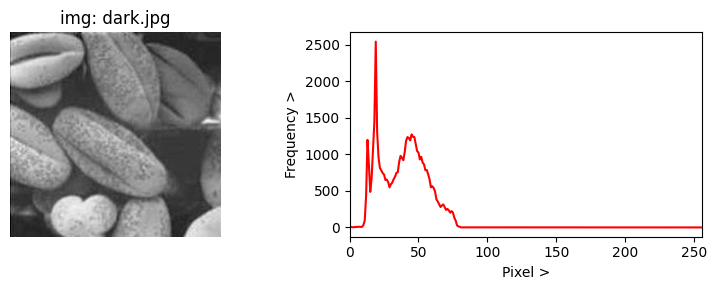

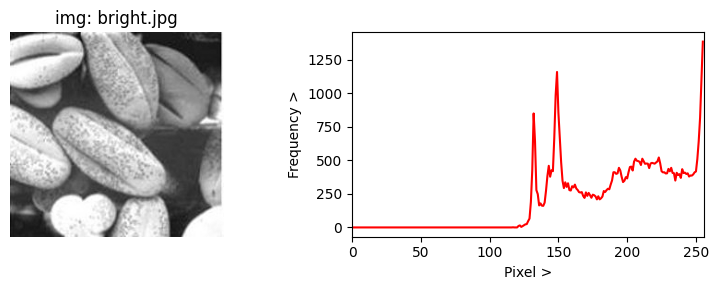

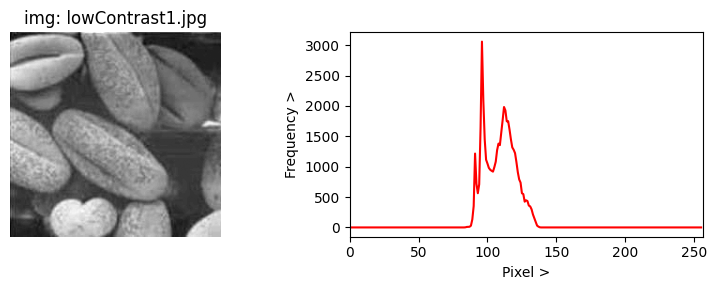

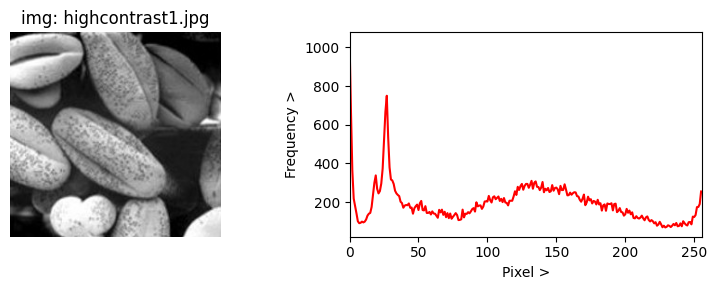

In [ ]:
image_files = ['dark.jpg', 'bright.jpg', 'lowContrast1.jpg', 'highcontrast1.jpg']

for file_name in image_files:
    img_bgr = cv2.imread(file_name)
    gray_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

    plt.figure(figsize=(8, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title(f'img: {file_name}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist, color='red')
    plt.xlabel('Pixel >')
    plt.ylabel('Frequency >')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

4. Histogram Equalization

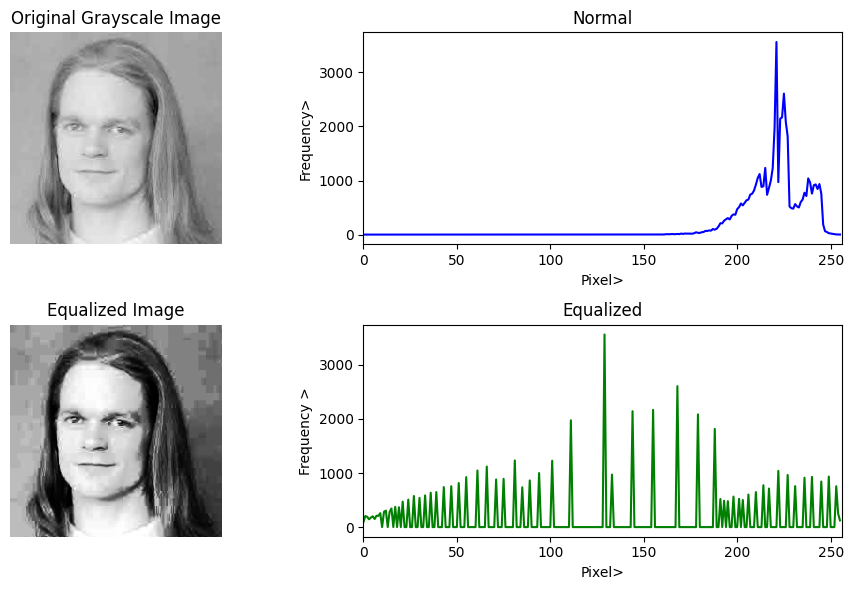

In [ ]:
image_path = 'hist_1.jpeg'
grayes = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

imge = cv2.equalizeHist(grayes)

histnormal = cv2.calcHist([grayes], [0], None, [256], [0, 256])
histeq = cv2.calcHist([imge], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(grayes, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(histnormal, color='blue')
plt.title('Normal')
plt.xlabel('Pixel>')
plt.ylabel('Frequency>')
plt.xlim([0, 256])

plt.subplot(2, 2, 3)
plt.imshow(imge, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(histeq, color='green')
plt.title('Equalized')
plt.xlabel('Pixel>')
plt.ylabel('Frequency >')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

5. Adaptive Historgam

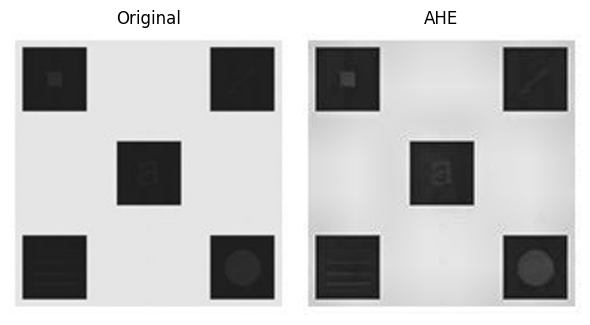

In [ ]:
image_path = 'AHE.jpg'

ogimg = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
aheon = clahe.apply(ogimg)

plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(ogimg, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aheon, cmap='gray')
plt.title('AHE')
plt.axis('off')

plt.tight_layout()
plt.show()

6. clahe

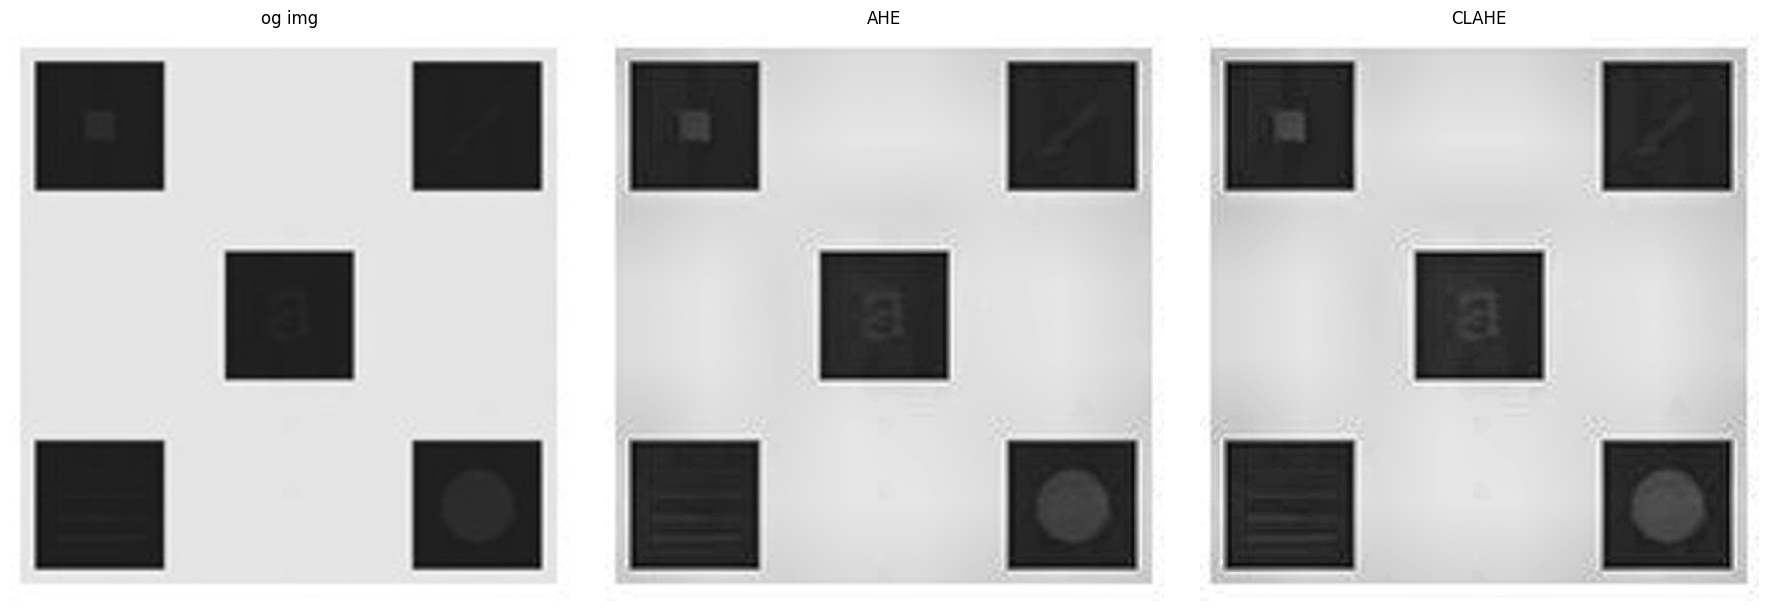

In [ ]:
cla = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
ahe = cla.apply(ogimg)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
claheon = clahe.apply(ogimg)

plt.figure(figsize=(18, 6))
#limited 3 cont
plt.subplot(1, 3, 1)
plt.imshow(ogimg, cmap='gray')
plt.title('og img')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ahe, cmap='gray')
plt.title('AHE')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(claheon, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.tight_layout()
plt.show()